# Problem statement

As we can see wines are very popular in eastern and european countries. Wine dealers wants to know which wine is good or bad based on quality rating and feature gradients in it.

For build a model they hires you as data scientist to build a model which can predidict for wine quality.


#**Data Description**

- **Type**: Type of wine red/White
- **volatile acidity** : Volatile acidity is the gaseous acids present in wine.
- **fixed acidity**: Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- **residual sugar** : Amount of sugar left after fermentation.
- **citric acid** : It is weak organic acid, found in citrus fruits naturally.
- **chlorides** : Amount of salt present in wine.
- **free sulfur dioxid**: So2 is used for prevention of wine by oxidation and microbial spoilage.
- **total sulfur dioxide** :Total sulphur di oxide
- **pH**: In wine pH is used for checking acidity
density
- **sulphate**: Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
-**alcohol** : Percent of alcohol present in wine.

# Importing libraries

In [1]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
%matplotlib inline
import seaborn as sns   #importing seaborn

# Loading dataset

In [2]:
data=pd.read_csv("/content/winequalityN.csv")

In [3]:
#top 5 rows
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("shape of data is ",data.shape)

shape of data is  (6497, 13)


- **DataTypes of columns**

In [5]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- **Checking for null values**

In [6]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
#storing all null value counts at one place
null_count=[]
for col in data.columns:
    if data[col].isnull().sum()!=0:
        null_count.append(col)

In [8]:
#columns having null values
null_count

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'pH',
 'sulphates']

- **null imputation**

In [9]:
#adding mean values to each columns
for col in null_count:
    data[col].fillna(data[col].mean(),inplace=True)

In [10]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- **Descreption of data**

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- **Information of data**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


- **categorical and continuous column distribution**

In [13]:
categorical_col,continuous_col=[],[]
def continuous_col_categorical_col(data):
    for col in data.columns:
        if data.dtypes[col]=="object":
            categorical_col.append(col)
        else:
            continuous_col.append(col)
    return categorical_col,continuous_col


In [14]:
categorical_col,continuous_col=continuous_col_categorical_col(data)

In [15]:
#categorical_columns
categorical_col

['type']

In [16]:
#continuous_columms
continuous_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [17]:
print(data["type"].value_counts())


white    4898
red      1599
Name: type, dtype: int64


In [18]:
#no. of unique value in column "quality"
data["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [19]:
#distribution of quality in two types, good or bad based on quality
quality_dist=[]
def quality_distribution(data):
    for cat in data["quality"]:
      if cat>5:
        quality_dist.append("good")
      else:
        quality_dist.append("Bad")
    return quality_dist

In [20]:
quality_dist=quality_distribution(data)

In [21]:
#adding new column "quality_dist"in dataset
data["quality_dist"]=quality_dist
#removing "quality" column from dataset
data.drop(["quality"],axis=1,inplace=True)

In [22]:
#checkin if dataset changes as per requirement
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_dist
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,good
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,good
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,good
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,good
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,Bad
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,good
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,good
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,Bad


In [23]:
#distribution of quality_dist
data['quality_dist'].value_counts()

good    4113
Bad     2384
Name: quality_dist, dtype: int64

In [24]:
#continuous_col after removing quality"
continuous_col=['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# **Univariate analysis for categorical columns**
- analysis by countplot and pie chart

white    4898
red      1599
Name: type, dtype: int64


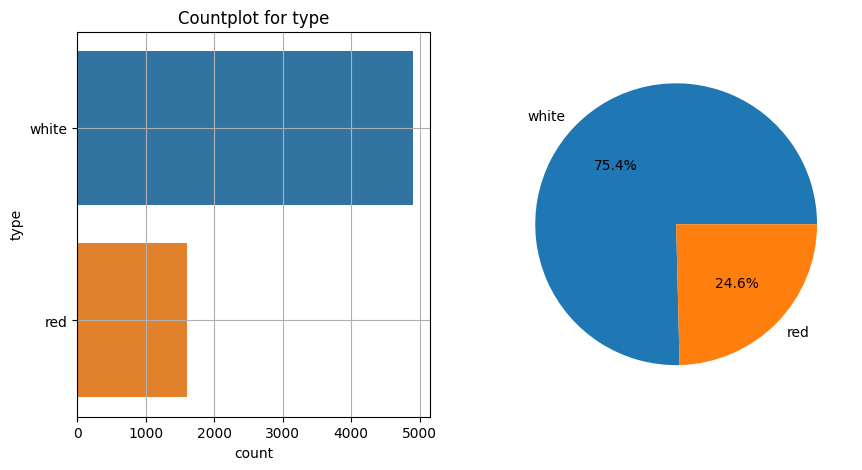

In [25]:
print(data["type"].value_counts())  #distribution for category["type"]
plt.figure(figsize=[10,5])  #initialisation of figure size
plt.subplot(1,2,1)  #subplot 1
plt.title("Countplot for type") #title for countplot
sns.countplot(y=data["type"],data=data) #countplot for data["type"]

plt.grid(); #to add grid in chart

plt.subplot(1,2,2)  #subplot 2
mylabel=data["type"].value_counts().index   #label for pie-chart
y=data["type"].value_counts().values    #values for each index
plt.pie(y,labels=mylabel,autopct="%1.1f%%") #pie chart for ["type"]
plt.show(); #to remove array in output

# **Univariate analysis for continuous columns**
- alalysis based on histogram

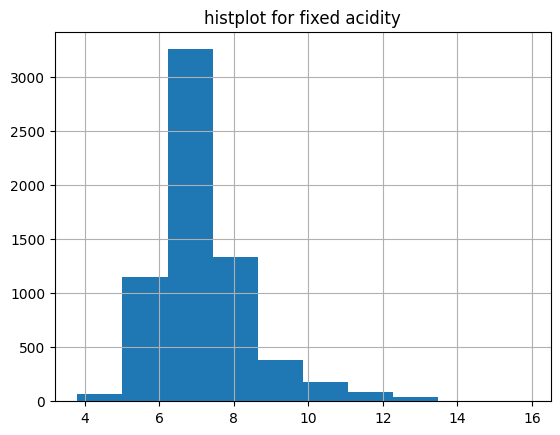

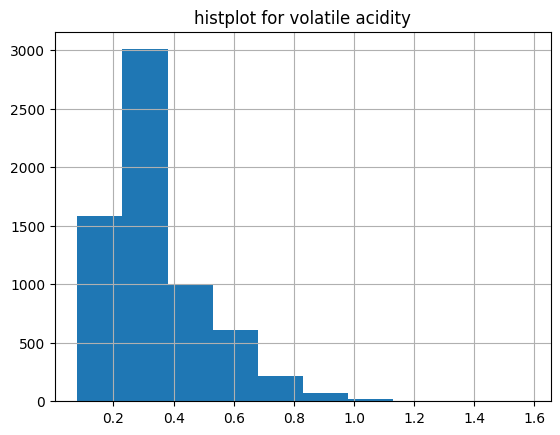

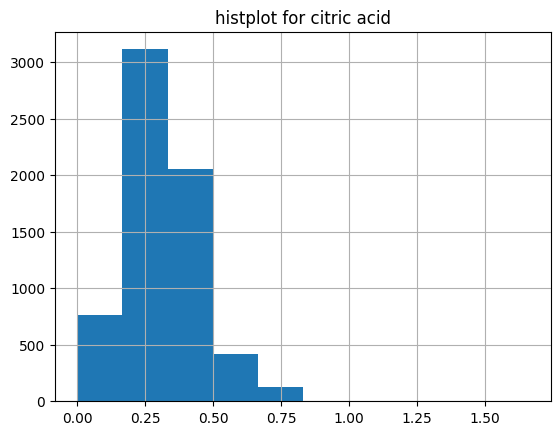

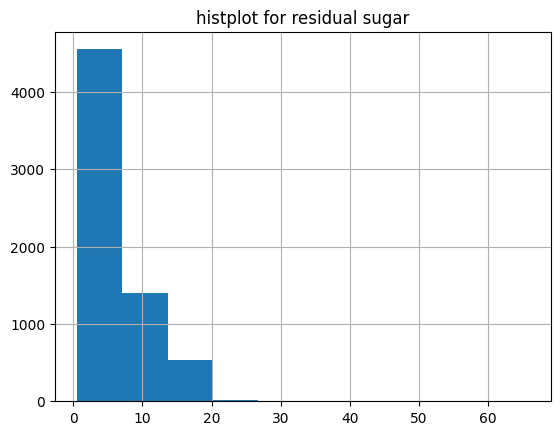

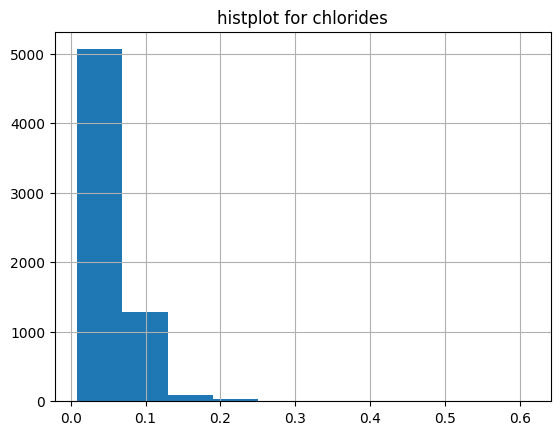

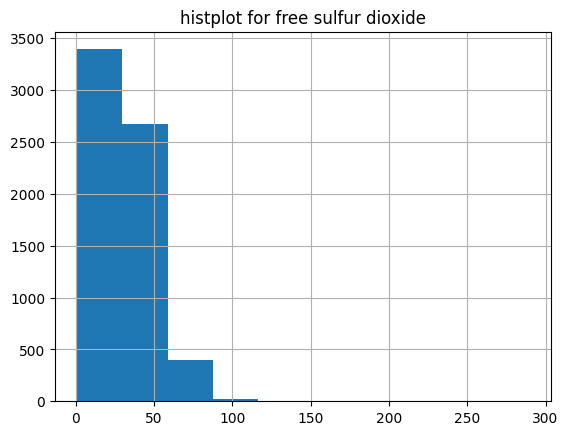

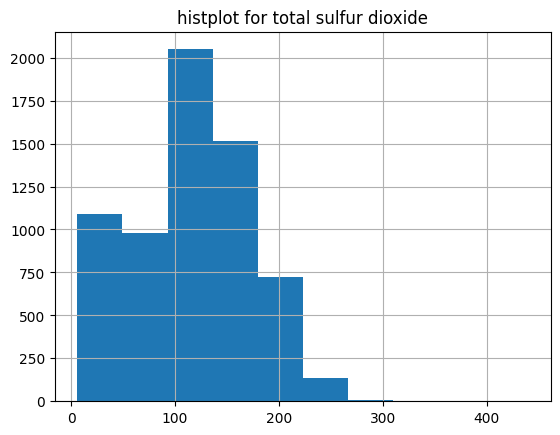

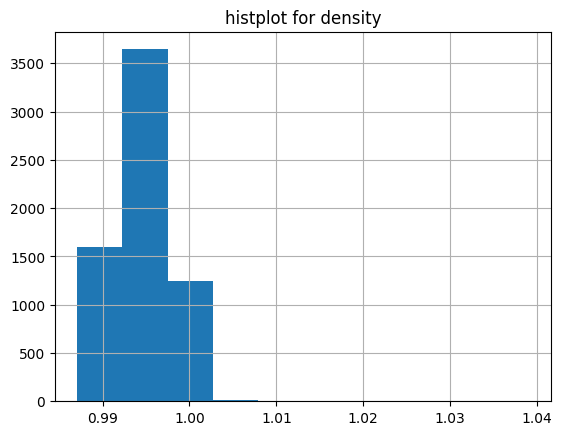

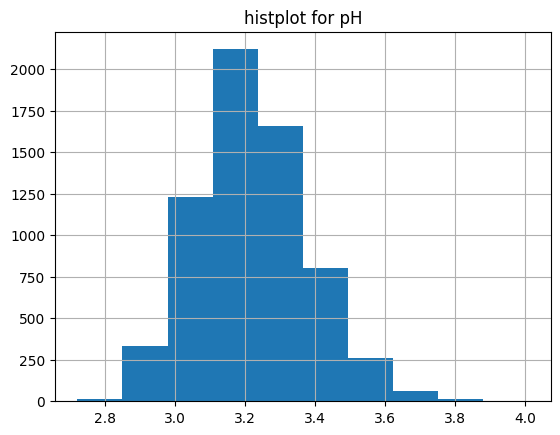

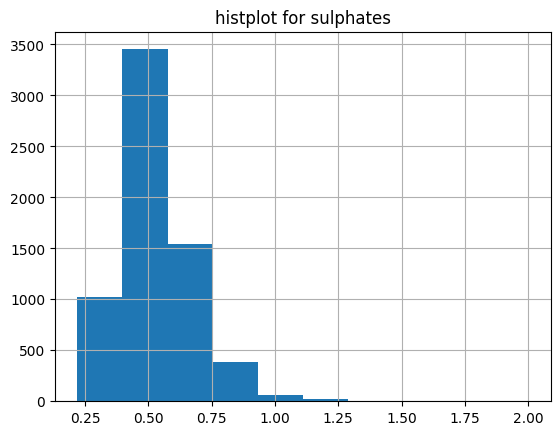

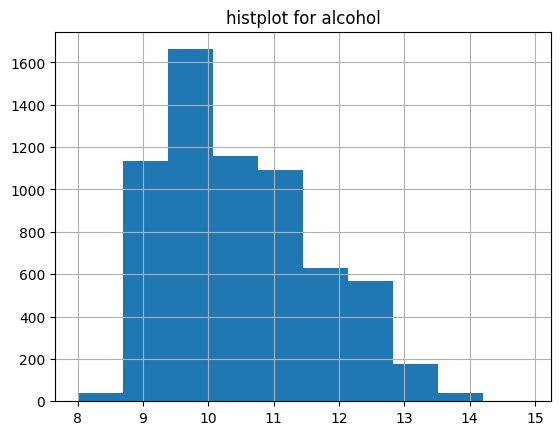

In [26]:
for col in continuous_col:
    plt.hist(data=data,x=col)   #histogram for all continuous columns
    plt.title("histplot for {}".format(col))    #giving title to histogram
    plt.grid(); #adding grid
    plt.show(); #to remove arrays in output

In [27]:
data.corr()

<ipython-input-27-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261


<ipython-input-28-40e56175b2c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

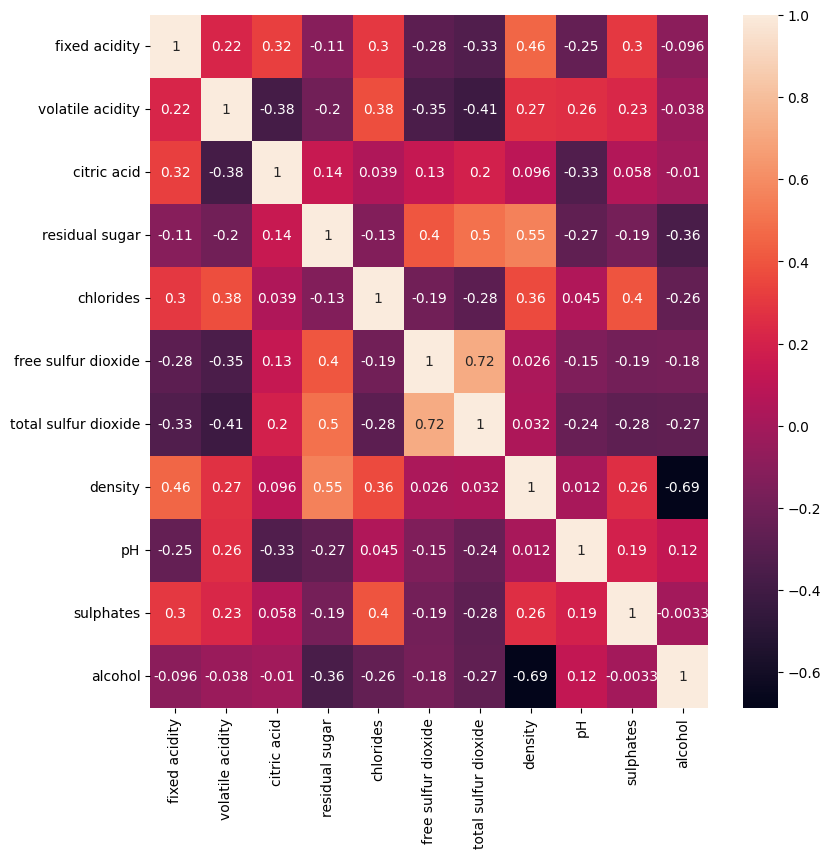

In [28]:
plt.figure(figsize=[9,9])
sns.heatmap(data.corr(),annot=True)

# **feature_encoding**
- **feature encoding using labelencoder**

In [29]:
from sklearn.preprocessing import LabelEncoder  #importing labelencoder from sklearn
encoder=LabelEncoder()  #assigning labelencoder into encoder

In [30]:
#label encoding for "type"
data["type"]=encoder.fit_transform(data["type"])
#label encoding for "quality_dist"
data["quality_dist"]=encoder.fit_transform(data["quality_dist"])

- **Preparation for training and test data**

In [31]:
#importing train test split from model_selection
from sklearn.model_selection import train_test_split
x=data.drop(["quality_dist"],axis=1)    #input features except quality_dist
y=data["quality_dist"]  #output feature "quality_dist"
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)   #spliting data into train(80%) and test(20%)

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


In [33]:
from sklearn.preprocessing import StandardScaler  #importing minmaxscaler to scale data into one scale
scale=StandardScaler()
x_train=scale.fit_transform(x_train)    #scaling data of x_train
x_test=scale.transform(x_test)  #tranforming scale into test data


# **KNN classifier model**

- **training to model**

In [34]:
from sklearn.neighbors import KNeighborsClassifier  #importing kNeighborsClassifier from sklearn
model=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree") #initializing model with n=5
model.fit(x_train,y_train)  #training to model with train data

KNeighborsClassifier(algorithm='kd_tree')

- **prediction on test data**

In [35]:
y_pred=model.predict(x_test)
print(y_pred)

[1 1 0 ... 1 1 1]


- **Prediction on train data**

In [36]:
y_pred_train=model.predict(x_train)
print(y_pred_train)

[1 0 1 ... 1 0 1]


# KPIs for classification model

In [37]:
from sklearn.metrics import accuracy_score,classification_report #impoting kpis
acc_scr_test=accuracy_score(y_test,y_pred) #calculating accuracy
print("accuracy score for test data is :",acc_scr_test)
acc_scr_train=accuracy_score(y_train,y_pred_train) #calculating accuracy
print("accuracy score for train data is :",acc_scr_train)

accuracy score for test data is : 0.7530769230769231
accuracy score for train data is : 0.8389455455070233


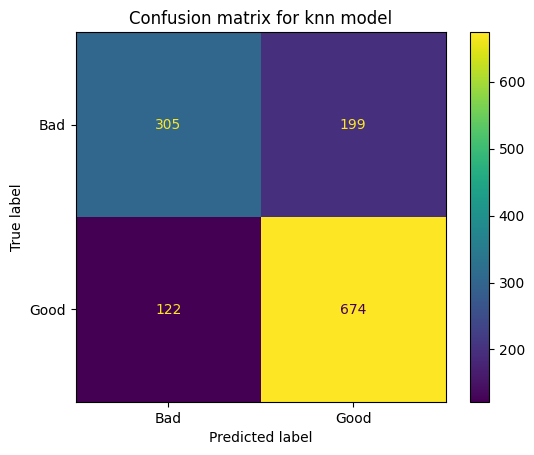

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm =confusion_matrix(y_test,y_pred)    #finding confusion matrix
class_names=["Bad","Good"]
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot() #plotting confusion matrix
plt.title("Confusion matrix for knn model")
plt.show()

- **classification report**

In [39]:
class_rep_test=classification_report(y_pred,y_test) #classification report
print("classification reprt for test data is :\n",class_rep_test)

classification reprt for test data is :
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       427
           1       0.85      0.77      0.81       873

    accuracy                           0.75      1300
   macro avg       0.73      0.74      0.73      1300
weighted avg       0.77      0.75      0.76      1300



#Elbow method

In [40]:
knn_neighbors_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]     #list for all values of neighbors
accuracy_score_list_test=[]  #list to store all accuracy for test data
accuracy_score_list_train=[] # list to store all accuracy for train data
for k in knn_neighbors_list:    #looping for all values of neighbors
    model=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree")   #initialising knn model
    model.fit(x_train,y_train)  #training to model

    knn_test_pred=model.predict(x_test) #prediction on test data
    knn_train_pred=model.predict(x_train) #prediction on train data
    accuracy_score_list_test.append(accuracy_score(y_test,knn_test_pred))    #accuracy score list for each value of k for test data
    accuracy_score_list_train.append(accuracy_score(y_train,knn_train_pred))    #accuracy score list for each value of k for train data

In [41]:
#creating dataframe for accuracy scores
df=pd.DataFrame({"k":knn_neighbors_list,
              "accuracy_score_train":accuracy_score_list_train,
                 "accuracy_score_test":accuracy_score_list_test})

In [42]:
df

,k,accuracy_score_train,accuracy_score_test
0,1,1.000000,0.776154
1,2,0.898018,0.740000
2,3,0.882240,0.761538
3,4,0.845488,0.737692
4,5,0.838946,0.753077
5,6,0.825861,0.736154
6,7,0.822013,0.737692
7,8,0.818357,0.748462
8,9,0.810852,0.750769
9,10,0.806812,0.743077


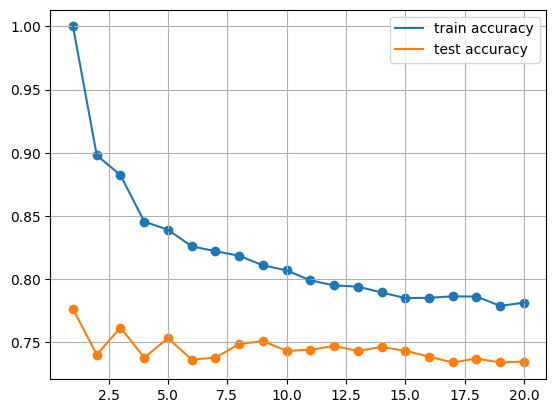

In [43]:
plt.plot(knn_neighbors_list,accuracy_score_list_train,label='train accuracy')    #plotting accuracy score for all value of k
plt.scatter(knn_neighbors_list,accuracy_score_list_train) #adding scatters
plt.plot(knn_neighbors_list,accuracy_score_list_test,label='test accuracy') #plotting accuracy score for all value of k
plt.scatter(knn_neighbors_list,accuracy_score_list_test)    #adding scatters
plt.legend();   #adding legends
plt.grid();

- **Loss curve for KNN**

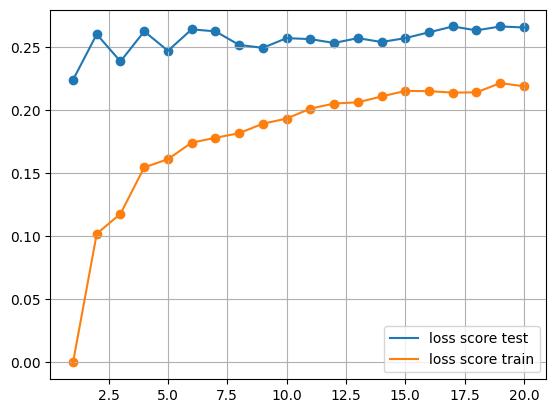

In [44]:
loss_list_train=[]    #loss list for training data
loss_list_test=[]    #loss list for testing data
for acc in accuracy_score_list_test: #for all accuracy in test accuracy list
    loss_list_test.append(1-acc) #appending all loss in losslist
for acc in accuracy_score_list_train: #for all accuracy in train accuracy list
    loss_list_train.append(1-acc) #appending all loss in train losslist

plt.plot(knn_neighbors_list,loss_list_test,label='loss score test') #plotting chart for test loss score
plt.scatter(knn_neighbors_list,loss_list_test)  #adding scatters to each k in knn list
plt.plot(knn_neighbors_list,loss_list_train,label='loss score train')   #plotting chart for train loss score
plt.scatter(knn_neighbors_list,loss_list_train) #adding scatters to each k in knn list
plt.legend();   #adding legends
plt.grid(); #to add grid on chart
plt.show(); #to remove array from background

# Logistic regression classifier

In [45]:
from sklearn.linear_model import LogisticRegression #importing logistic regression
log_reg_model=LogisticRegression()  #assigning model to log_reg_model
log_reg_model.fit(x_train,y_train)  #train model

LogisticRegression()

- **Accuracy score**

In [46]:
log_reg_model_pred_test=log_reg_model.predict(x_test)    #predicting for test data
acc_scr_log_reg_test=accuracy_score(log_reg_model_pred_test,y_test)   #accuracy score for test predictions
print("accuracy score for test data is :",acc_scr_log_reg_test)

log_reg_model_pred_train=log_reg_model.predict(x_train)    #predicting for train data
acc_scr_log_reg_train=accuracy_score(log_reg_model_pred_train,y_train)   #accuracy score for training predictions
print("accuracy score for training data is :",acc_scr_log_reg_train)

accuracy score for test data is : 0.7292307692307692
accuracy score for training data is : 0.741774100442563


- **confusion matrix**

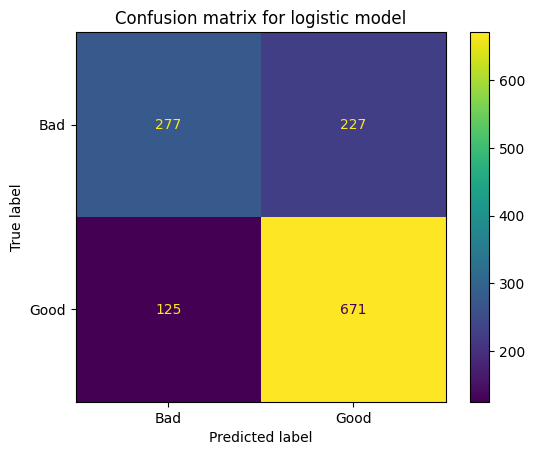

In [47]:
cm_log_reg=confusion_matrix(y_test,log_reg_model_pred_test)  #confusion matrix
disp_log=ConfusionMatrixDisplay(confusion_matrix=cm_log_reg,display_labels=class_names)    #display confusion matrix
disp_log.plot()
plt.title("Confusion matrix for logistic model")
plt.show();

# **Regularization**
- **Regularization with different penalty to reduce over fitting**

accuracy score of log_reg_l1 model is : 0.7284615384615385


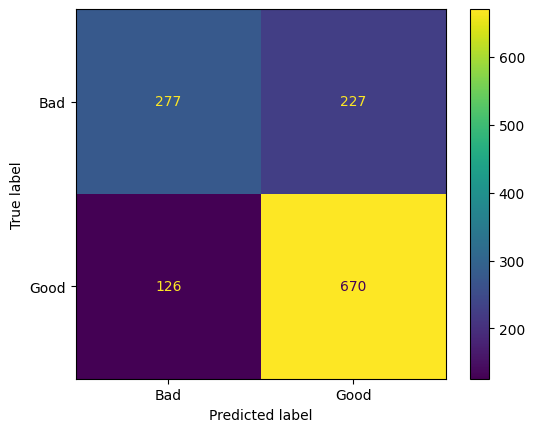

In [48]:
log_reg_l1=LogisticRegression(penalty="l1",solver="liblinear")
log_reg_l1.fit(x_train,y_train)
log_reg_l1_pred=log_reg_l1.predict(x_test)
log_reg_l1_acc=accuracy_score(y_test,log_reg_l1_pred)
print("accuracy score of log_reg_l1 model is :",log_reg_l1_acc)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_l1 =confusion_matrix(y_test,log_reg_l1_pred)    #finding confusion matrix
disp_l1=ConfusionMatrixDisplay(confusion_matrix=cm_l1,display_labels=class_names)
disp_l1.plot() #plotting confusion matrix
plt.show()

accuracy score of log_reg_l2 model is : 0.7292307692307692


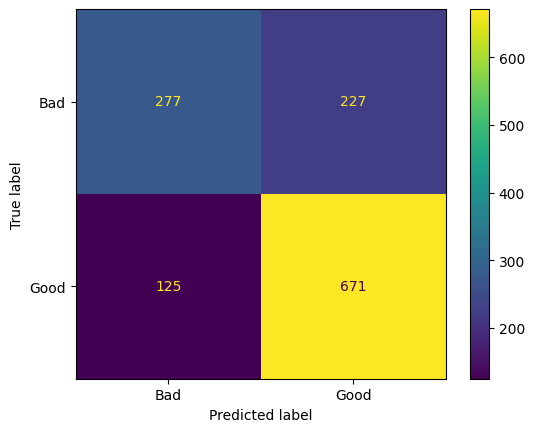

In [49]:
log_reg_l2=LogisticRegression(penalty="l2")
log_reg_l2.fit(x_train,y_train)
log_reg_l2_pred=log_reg_l2.predict(x_test)
log_reg_l2_acc=accuracy_score(y_test,log_reg_l2_pred)
print("accuracy score of log_reg_l2 model is :",log_reg_l2_acc)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_l2 =confusion_matrix(y_test,log_reg_l2_pred)    #finding confusion matrix
disp_l2=ConfusionMatrixDisplay(confusion_matrix=cm_l2,display_labels=class_names)
disp_l2.plot() #plotting confusion matrix
plt.show()

0.6123076923076923
accuracy score of log_reg_elastic model is : 0.6123076923076923


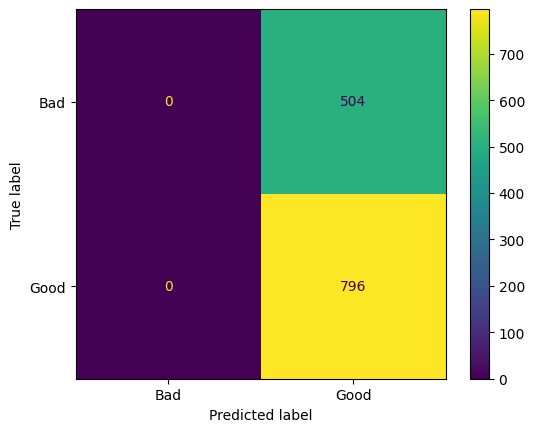

In [50]:
from sklearn.linear_model import ElasticNet
log_reg_elas=ElasticNet()

log_reg_elas.fit(x_train,y_train)
log_reg_elas_pred=log_reg_elas.predict(x_test)
log_reg_elas_acc=accuracy_score(y_test,log_reg_elas_pred.round())
print(log_reg_elas_acc)
print("accuracy score of log_reg_elastic model is :",log_reg_elas_acc)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_elas =confusion_matrix(y_test,log_reg_elas_pred.round())    #finding confusion matrix
disp_elas=ConfusionMatrixDisplay(confusion_matrix=cm_elas,display_labels=class_names)
disp_elas.plot() #plotting confusion matrix
plt.show()

# **hyperparameter tuning**
- **using GridSearchCV on Logistic regression**

In [51]:
from sklearn.model_selection import GridSearchCV
penalty=["l1","l2","elasticnet","none"]
dual=[False,True]
solver=["lbfgs", "liblinear","newton-cg","newton-cholesky","sag","saga"]
max_iter=[10,100,1000,5000]
fit_intercept=[True,False]
param={"penalty":penalty,
       "dual":dual,
       "fit_intercept":fit_intercept,
       "solver":solver,
       "max_iter":max_iter,
       "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

model_grid=GridSearchCV(LogisticRegression(),param,cv=3)
model_grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [False, True], 'fit_intercept': [True, False],
                         'max_iter': [10, 100, 1000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

- **Best parameters for tuning**

In [52]:
model_grid.best_params_

{'C': 10,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

- **Training with best parameters**

In [53]:
model_grid_tuned=LogisticRegression(C=10,dual=True,fit_intercept=True,penalty="l2",solver="liblinear",max_iter=100)
model_grid_tuned.fit(x_train,y_train) #training with best fit parameter
tuned_prediction_grid=model_grid_tuned.predict(x_test)    #prediction on test data

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


- **Accuracy_score tuned**

0.7276923076923076


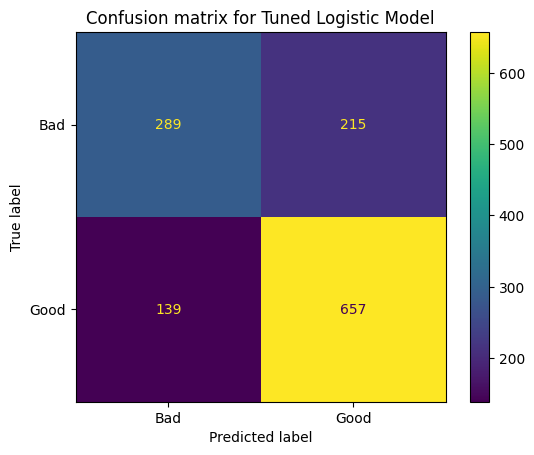

In [54]:
acc_scr_grid_tuned=accuracy_score(y_test,tuned_prediction_grid)
print(acc_scr_grid_tuned)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_tuned_log =confusion_matrix(y_test,tuned_prediction_grid)    #finding confusion matrix
disp_tuned_log=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_log,display_labels=class_names)
disp_tuned_log.plot() #plotting confusion matrix
plt.title("Confusion matrix for Tuned Logistic Model")
plt.show()

# **hyperparameter tuning**
- **using RandomSeachCV on Logistic regression**

In [56]:
from sklearn.model_selection import RandomizedSearchCV
penalty=["l1","l2","elasticnet","none"]
dual=[False,True]
solver=["lbfgs", "liblinear","newton-cg","newton-cholesky","sag","saga"]
max_iter=[10,100,1000,5000]
fit_intercept=[True,False]
param_random_log={"penalty":penalty,
       "dual":dual,
       "fit_intercept":fit_intercept,
       "solver":solver,
       "max_iter":max_iter,
       "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_model_random=RandomizedSearchCV(LogisticRegression(),param_random_log,cv=3)
log_model_random.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: Futur

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'max_iter': [10, 100, 1000, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

- **Best parameters for tuning**

In [57]:
log_model_random.best_params_

{'solver': 'lbfgs',
 'penalty': 'none',
 'max_iter': 10,
 'fit_intercept': True,
 'dual': False,
 'C': 1000}

- **Tuning of model using best params**

In [58]:
log_random_tuned=LogisticRegression(C=1000,dual=False,fit_intercept=True,penalty="none",solver="lbfgs",max_iter=10)
log_random_tuned.fit(x_train,y_train) #training with best fit parameter
tuned_prediction_random=log_random_tuned.predict(x_test)    #prediction on test data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7284615384615385


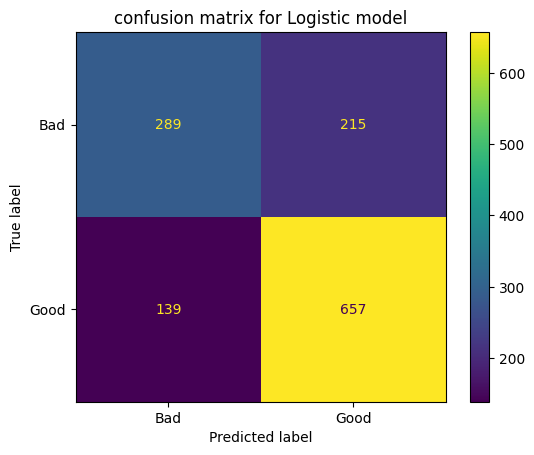

In [60]:
acc_scr_random_tuned=accuracy_score(y_test,tuned_prediction_random) #accuracy score
print(acc_scr_random_tuned)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_tuned_log =confusion_matrix(y_test,tuned_prediction_grid)    #finding confusion matrix
disp_tuned_log=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_log,display_labels=class_names)
disp_tuned_log.plot() #plotting confusion matrix
plt.title("confusion matrix for Logistic model")
plt.show()

# **Hyperparameter tuning**
- **Using GridSearchCv for KNN classifier**

In [70]:
from sklearn.model_selection import GridSearchCV #importing grid searchcv
#creating param_grid
knn_grid_params= { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
                   }
knn_model_grid=GridSearchCV(KNeighborsClassifier(),knn_grid_params,cv=10)
knn_model_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']})

In [71]:
knn_model_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

In [72]:
knn_tuned_grid=KNeighborsClassifier(metric="manhattan",n_neighbors=17,weights="distance")
knn_tuned_grid.fit(x_train,y_train)
grid_tuned_pred_knn=knn_tuned_grid.predict(x_test)
acc_scr_grid_tuned_knn=accuracy_score(y_test,grid_tuned_pred_knn)

accuracy score for gridsearchcv tuned knn is : 0.8053846153846154


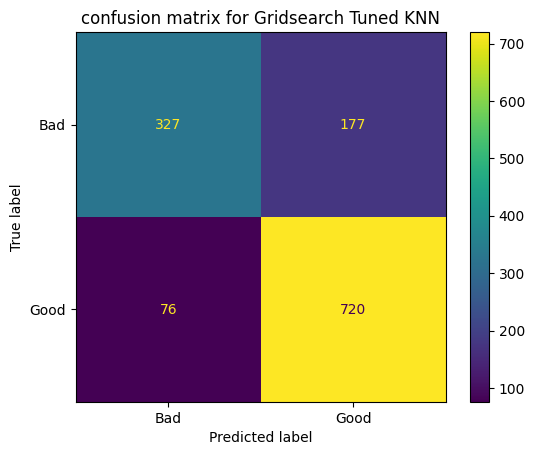

In [73]:
print("accuracy score for gridsearchcv tuned knn is :",acc_scr_grid_tuned_knn)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_tuned_knn_grid =confusion_matrix(y_test,grid_tuned_pred_knn)    #finding confusion matrix
disp_grid_tuned_knn=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn_grid,display_labels=class_names)
disp_grid_tuned_knn.plot() #plotting confusion matrix
plt.title("confusion matrix for Gridsearch Tuned KNN")
plt.show()

- **Tuning using RandomSearchCV**

In [66]:
from sklearn.model_selection import RandomizedSearchCV

knn_random_params = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_model_random=RandomizedSearchCV(KNeighborsClassifier(),knn_random_params,cv=10)
knn_model_random.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']})

In [67]:
knn_model_random.best_params_

{'weights': 'distance', 'n_neighbors': 18, 'metric': 'euclidean'}

In [68]:
knn_tuned_random=KNeighborsClassifier(metric="euclidean",n_neighbors=18,weights="distance")
knn_tuned_random.fit(x_train,y_train)
random_tuned_pred_knn=knn_tuned_random.predict(x_test)
acc_scr_random_tuned_knn=accuracy_score(y_test,random_tuned_pred_knn)

accuracy score for randomsearchcv tuned knn is : 0.8007692307692308


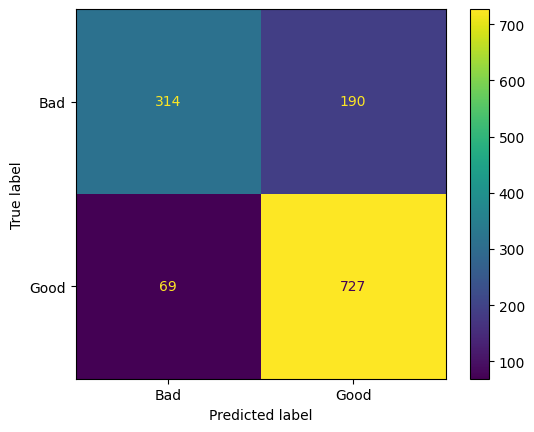

In [69]:
print("accuracy score for randomsearchcv tuned knn is :",acc_scr_random_tuned_knn)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_tuned_knn_random =confusion_matrix(y_test,random_tuned_pred_knn)    #finding confusion matrix
disp_random_tuned_knn=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn_random,display_labels=class_names)
disp_random_tuned_knn.plot() #plotting confusion matrix
plt.show()

# SVM classifier

In [74]:
#importing svm classifier model
from sklearn.svm import SVC
model_svc=SVC()

In [75]:
#training to svm classifier model
model_svc.fit(x_train,y_train)

SVC()

In [76]:
#predictions on test data
svc_predict_train=model_svc.predict(x_train)
svc_predict=model_svc.predict(x_test)
#checking accuracy score
svc_acc_scr=accuracy_score(y_test,svc_predict)
svc_acc_scr_train=accuracy_score(y_train,svc_predict_train)
print("accuracy_score of svm test classifier is: ",svc_acc_scr)
print("accuracy_score of svm train classifier is: ",svc_acc_scr_train)

accuracy_score of svm test classifier is:  0.7676923076923077
accuracy_score of svm train classifier is:  0.7943044063883009


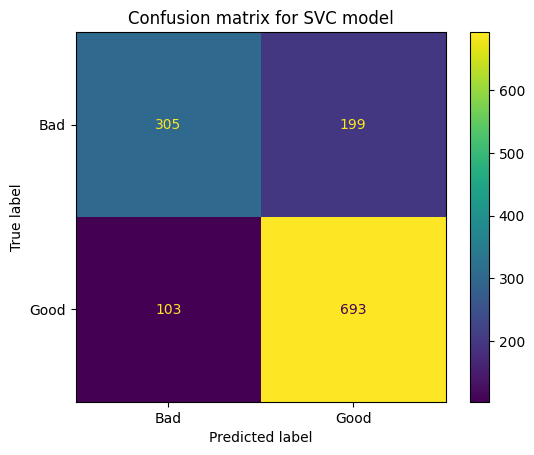

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #importing confusion metrix and confusionmatrixdisplay
cm_svc=confusion_matrix(y_test,svc_predict)    #finding confusion matrix
disp_svc=ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=class_names)
disp_svc.plot() #plotting confusion matrix
plt.title("Confusion matrix for SVC model")
plt.show()

# **Hyperparameter tuning**
- **Using GridSearchCV**

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  "kernel": ['rbf']}

grid_svm =GridSearchCV(SVC(), param_grid_svm,cv=10)
grid_svm.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [79]:
grid_svm.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [80]:
tuned_grid_svm=SVC(C=10,gamma=0.1,kernel='rbf')
tuned_grid_svm.fit(x_train,y_train)
tuned_grid_svm_pred=tuned_grid_svm.predict(x_test)
acc_tuned_grid_svm=accuracy_score(y_test,tuned_grid_svm_pred)
print(acc_tuned_grid_svm)

0.7815384615384615


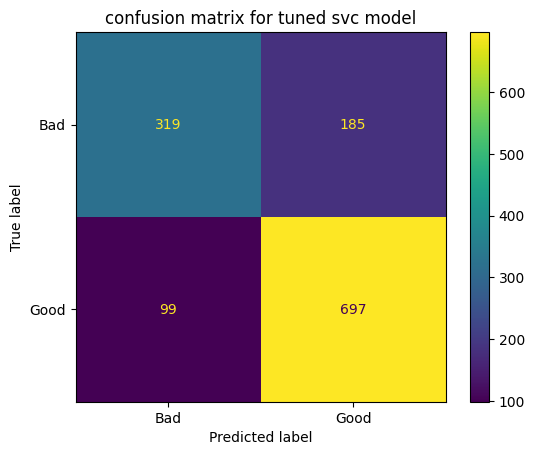

In [81]:
cm_tuned_svc=confusion_matrix(y_test,tuned_grid_svm_pred)
class_names=["Bad","Good"]  #class names to confusion matrix
svc_tuned_disp=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_svc,display_labels=class_names)
svc_tuned_disp.plot()  #plotting confusion matrix
plt.title("confusion matrix for tuned svc model")
plt.show()

- **Tuning using Randomsearchcv**

In [84]:
from sklearn.model_selection import RandomizedSearchCV
param_random_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  "kernel": ['rbf']}

random_svm =RandomizedSearchCV(SVC(), param_random_svm,cv=10)
random_svm.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']})

In [85]:
random_svm.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 100}

In [86]:
tuned_grid_svm=SVC(C=100,gamma=1,kernel='rbf')
tuned_grid_svm.fit(x_train,y_train)
tuned_grid_svm_pred=tuned_grid_svm.predict(x_test)
acc_tuned_random_svm=accuracy_score(y_test,tuned_grid_svm_pred)
print(acc_tuned_random_svm)

0.7792307692307693


# Decision tree classifier

In [87]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
#training to DT model
model_dt.fit(x_train,y_train)
#predicting for test data
dt_pred=model_dt.predict(x_test)
#predicting for train data
dt_pred_train=model_dt.predict(x_train)

accuracy score of decision tree train data is : 1.0
accuracy score of decision tree test data is : 0.7723076923076924



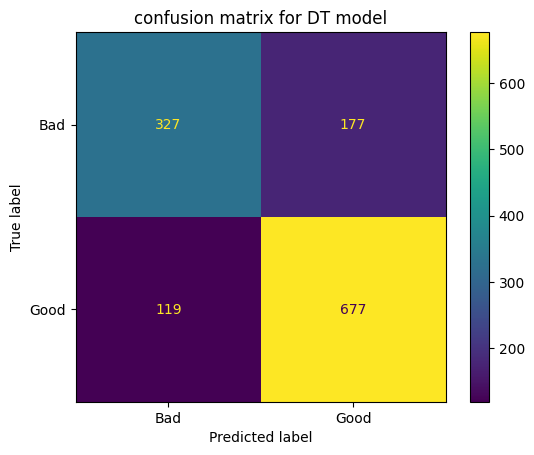

In [88]:
#accuracy score for predictions
acc_scr_DT_train=accuracy_score(y_train,dt_pred_train)
print("accuracy score of decision tree train data is :",acc_scr_DT_train)
#accuracy score for predictions
acc_scr_DT=accuracy_score(y_test,dt_pred)
print("accuracy score of decision tree test data is :",acc_scr_DT)
cm_dt=confusion_matrix(y_test,dt_pred)
print()
class_names=["Bad","Good"]  #class names to confusion matrix
dt_disp=ConfusionMatrixDisplay(confusion_matrix=cm_dt,display_labels=class_names)
dt_disp.plot()  #plotting confusion matrix
plt.title("confusion matrix for DT model")
plt.show()

# **Tuning of Decision tree classifier**
- **Using GridsearchCV**

In [89]:
criterion=["gini","entropy","log_loss"]
splitter=["best","random"]
max_depth = [5,10,20,50,100,1000,10000]
max_features = ['auto', 'sqrt']
param_grid_dt=({"max_features":max_features,
                "criterion":criterion,
                "splitter":splitter,
                "max_depth":max_depth})
grid_dt=GridSearchCV(DecisionTreeClassifier(),param_grid_dt)
grid_dt.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']})

- **best params**

In [90]:
grid_dt.best_params_

{'criterion': 'log_loss',
 'max_depth': 10000,
 'max_features': 'sqrt',
 'splitter': 'best'}

- **Tuned model**

In [91]:
#tuned model
tuned_dt=DecisionTreeClassifier(criterion='log_loss',max_depth=10000,splitter='best',max_features='sqrt')
#model training by train data
tuned_dt.fit(x_train,y_train)
#prediction on test data
tuned_dt_pred=tuned_dt.predict(x_test)

- **Accuracy score and confusion matrix**

accuracy_score of tuned decision tree is  0.7523076923076923


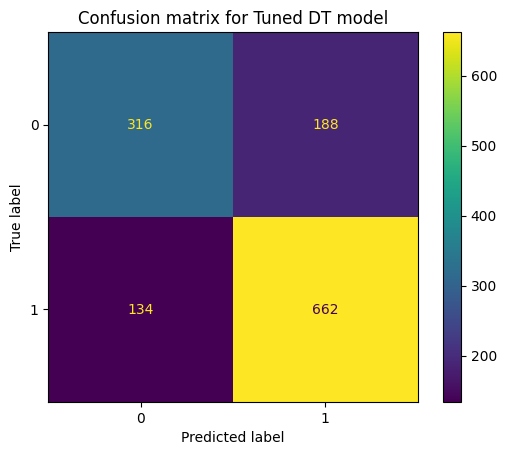

In [92]:
#accuracy score
acc_scr_grid_tuned_DT=accuracy_score(y_test,tuned_dt_pred)
print("accuracy_score of tuned decision tree is ",acc_scr_grid_tuned_DT)
cm_tuned_dt=confusion_matrix(y_test,tuned_dt_pred)
dt_tuned_disp=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt)
#plotting confusion matrix
dt_tuned_disp.plot()
plt.title("Confusion matrix for Tuned DT model")
plt.show();

- **Using RandomsearchCV**

In [93]:
criterion=["gini","entropy","log_loss"]
splitter=["best","random"]
max_depth = [5,10,20,50,100,1000,10000]
max_features = ['auto', 'sqrt']

param_random_dt=({"max_features":max_features,
                "criterion":criterion,
                "splitter":splitter,
                "max_depth":max_depth})
random_dt=RandomizedSearchCV(DecisionTreeClassifier(),param_random_dt)
random_dt.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 20, 50, 100, 1000,
                                                      10000],
                                        'max_features': ['auto', 'sqrt'],
                                        'splitter': ['best', 'random']})

- **Best params**

In [94]:
random_dt.best_params_

{'splitter': 'best',
 'max_features': 'auto',
 'max_depth': 50,
 'criterion': 'gini'}

In [95]:
tuned_random_dt=DecisionTreeClassifier(criterion='gini',max_depth=50,splitter='best',max_features='auto')
tuned_random_dt.fit(x_train,y_train)
tuned_random_dt_pred=tuned_dt.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


- **Accuracy score and Confusion matrix**

accuracy_score of tuned decision tree is  0.7523076923076923


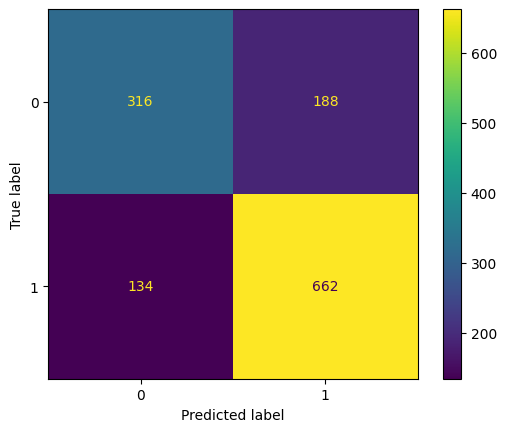

In [96]:
acc_scr_random_tuned_DT=accuracy_score(y_test,tuned_random_dt_pred)
print("accuracy_score of tuned decision tree is ",acc_scr_random_tuned_DT)
cm_tuned_random_dt=confusion_matrix(y_test,tuned_random_dt_pred)
dt_tuned_random_disp=ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt)
dt_tuned_random_disp.plot()
plt.show();

# **Random forest classifier**

In [97]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
rf_pred=model_rf.predict(x_test)
rf_pred_train=model_rf.predict(x_train)

accuracy score of Random forest classifier train data is : 0.9996151625938041
accuracy score of Random forest classifier test data is : 0.8153846153846154


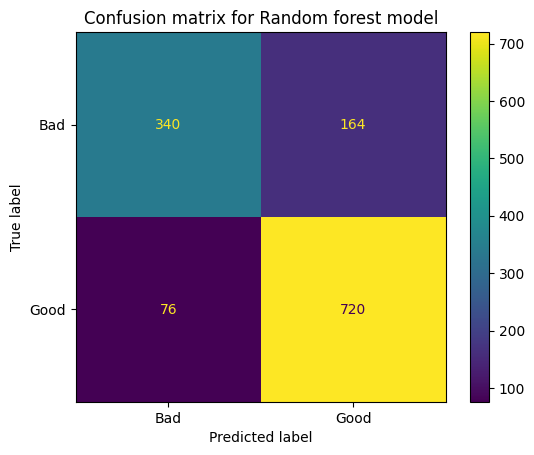

In [98]:
acc_scr_RF_train=accuracy_score(y_train,rf_pred_train)
print("accuracy score of Random forest classifier train data is :",acc_scr_RF_train)
acc_scr_RF=accuracy_score(y_test,rf_pred)
print("accuracy score of Random forest classifier test data is :",acc_scr_RF)
cm_rf=confusion_matrix(y_test,rf_pred)
rf_disp=ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=class_names)
rf_disp.plot()
plt.title("Confusion matrix for Random forest model")
plt.show();

# **Tunning random forest classifier**


In [99]:
# n_estimators=[int(x) for x in np.linspace(start=400,stop=1000,num=10)]
# max_depth=[int(x) for x in np.linspace(400,1000,10)]
# bootstrap=[True, False]
# param_grid_rf=({'bootstrap':bootstrap,
#                 'max_depth':max_depth,
#                 'n_estimators':n_estimators})
# grid_rf_model=GridSearchCV(RandomForestClassifier(),param_grid_rf,cv=10)
# grid_rf_model.fit(x_train,y_train)

KeyboardInterrupt: ignored

- **Best params**

In [ ]:
# grid_rf_model.best_params_

{'n_estimators': 733,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 450,
 'bootstrap': False}

- **Tunning**

In [138]:
# # grid_tuned_rf_model=RandomForestClassifier(n_estimators=900,max_depth=340,bootstrap=True)
# grid_tuned_rf_model.fit(x_train,y_train)
# grid_tuned_rf_pred=grid_tuned_rf_model.predict(x_test)

- **Accuracy score and Confusion matrix**

accuracy_score of tuned random forest is  0.823076923076923


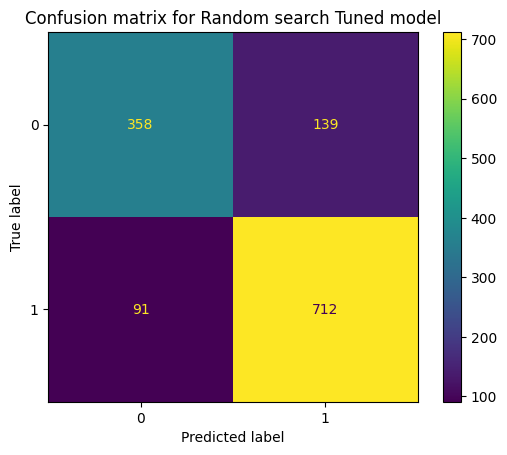

In [139]:
# acc_scr_grid_tuned_RF=accuracy_score(y_test,grid_tuned_rf_pred)
# print("accuracy_score of tuned random forest is ",acc_scr_grid_tuned_RF)
# cm_grid_tuned_rf=confusion_matrix(y_test,grid_tuned_rf_pred)
# rf_grid_tuned_disp=ConfusionMatrixDisplay(confusion_matrix=cm_grid_tuned_rf)
# rf_grid_tuned_disp.plot()
# plt.title("Confusion matrix for Random search Tuned model")
# plt.show();

- **Tuning Using RandomsearchCV**

In [100]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_depth=[int(x) for x in np.linspace(10,1000,10)]
bootstrap=[True, False]
param_random_rf=({'bootstrap':bootstrap,
                'max_depth':max_depth,
                'n_estimators':n_estimators
                })
random_rf_model=RandomizedSearchCV(RandomForestClassifier(),param_random_rf)
random_rf_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]})

- **Best params**

In [101]:
random_rf_model.best_params_

{'n_estimators': 733, 'max_depth': 1000, 'bootstrap': True}

In [103]:
randomsearch_tuned_rf_model=RandomForestClassifier(max_depth=1000,bootstrap=True,n_estimators=733)
randomsearch_tuned_rf_model.fit(x_train,y_train)
tuned_random_pred=randomsearch_tuned_rf_model.predict(x_test)

accuracy_score of tuned decision tree is  0.8207692307692308


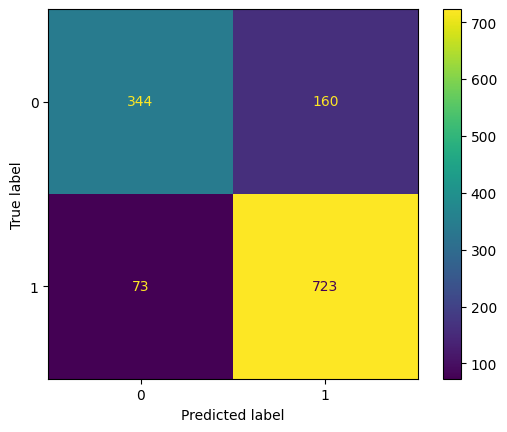

In [104]:
acc_scr_random_tuned_RF=accuracy_score(y_test,tuned_random_pred)
print("accuracy_score of tuned decision tree is ",acc_scr_random_tuned_RF)
cm_random_tuned_rf=confusion_matrix(y_test,tuned_random_pred)
rf_random_tuned_disp=ConfusionMatrixDisplay(confusion_matrix=cm_random_tuned_rf)
rf_random_tuned_disp.plot()
plt.show();

# Evaluation of Models

In [105]:
model_comparision=pd.DataFrame({"model_name":["KNN_classifier","grid_tuned_knn","random_tuned_knn","log_reg_classifier","grid_tuned_log_reg","random_tuned_log_reg","svm_classifier","grid_tuned_svm","random_tuned_svm","DTclassifier","grid_tuned_DT","random_tuned_DT","Random_forest_classifier","random_tuned_Random_forest"],
                                "accuracy_score":[acc_scr_test,acc_scr_grid_tuned_knn,acc_scr_random_tuned_knn,acc_scr_log_reg_test,acc_scr_grid_tuned,acc_scr_random_tuned,svc_acc_scr,acc_tuned_grid_svm,acc_tuned_random_svm,acc_scr_DT,acc_scr_grid_tuned_DT,acc_scr_random_tuned_DT,acc_scr_RF,acc_scr_random_tuned_RF]
})

In [106]:
model_comparision

,model_name,accuracy_score
0,KNN_classifier,0.753077
1,grid_tuned_knn,0.805385
2,random_tuned_knn,0.800769
3,log_reg_classifier,0.729231
4,grid_tuned_log_reg,0.727692
5,random_tuned_log_reg,0.728462
6,svm_classifier,0.767692
7,grid_tuned_svm,0.781538
8,random_tuned_svm,0.779231
9,DTclassifier,0.772308
